In [1]:
!pip install numpy matplotlib scipy

Optimal value: 25.0
Optimal solution (x, y): [5. 5.]


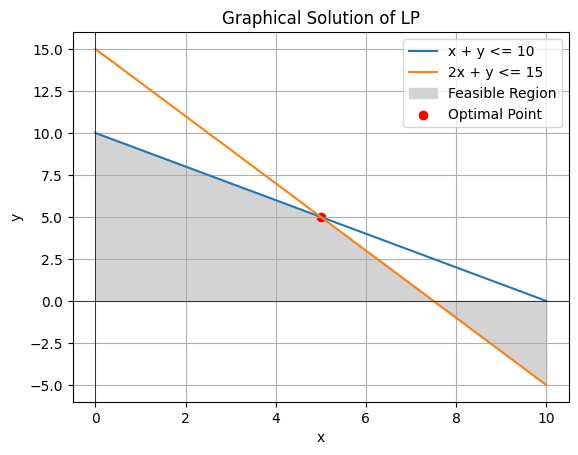

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Objective function (example: maximize z = 3x + 2y → minimize -3x - 2y)
c = [-3, -2]

# Constraints (Ax <= b)
A = [[1, 1],  # x + y
     [2, 1]]  # 2x + y
b = [10, 15]  # RHS values

# Bounds for variables (x, y >= 0)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the LP problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

print("Optimal value:", -result.fun)  # Negative because we minimized
print("Optimal solution (x, y):", result.x)

# Plot the graph
x = np.linspace(0, 10, 400)
y1 = 10 - x  # Line for x + y <= 10
y2 = 15 - 2 * x  # Line for 2x + y <= 15

plt.plot(x, y1, label="x + y <= 10")
plt.plot(x, y2, label="2x + y <= 15")

plt.fill_between(x, np.minimum(y1, y2), 0, where=(x >= 0), color='lightgrey', label='Feasible Region')
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.scatter(result.x[0], result.x[1], color='red', label='Optimal Point')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Graphical Solution of LP')
plt.grid()
plt.show()
